In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter

In [2]:
df = pd.read_csv('Taxi_Trips_-_2021.csv')

In [3]:
df

Trip ID  \
0        02fc5d8c3e8525a49b7514bd6c2b3301c2d6aa79   
1        33eb5c7a1439ac1e3ec6d1520e21db8137d1d11b   
2        4bcfcfa78f372b705214ee2cba9c765ad6ba5161   
3        655bbd9bcb0a78ee003e304ebbe350b21cdd7083   
4        7b7b8108de94a518607068a7369ceea1ab2ae924   
...                                           ...   
3948040  f352a258565d7fbe4517d2489d283bc514dd7783   
3948041  fa3f603280d61decec6290294d9637d4ef9b5dbd   
3948042  fdfaa0c7385e64942a51fc392d65b783d1fe3f2f   
3948043  a9e0681fc38df3270c02d1352218a54e46a05463   
3948044  da925ce1850eff6ab0ab3185e6c9655ef2b9958b   

                                                   Taxi ID  \
0        7e179f8ef66ae99ec2d1ec89224e0b7ee5469fe5627f6d...   
1        2c508057a94474215bdea7b101edad0dc911ef61bb99e6...   
2        31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...   
3        f6138aa35e1fb074eb79fbe29f512b6153dca3593d8cd2...   
4        2c508057a94474215bdea7b101edad0dc911ef61bb99e6...   
...                                                    ...   
3948040  73c53bd1d015d25541aa53570b7f1dd2227cf25b2bed0c...   
3948041  c7124fa9d2cf60c883f6a53293407b9e7c5100176cd25a...   
3948042  7e179f8ef66ae99ec2d1ec89224e0b7ee5469fe5627f6d...   
3948043  c8f52a1c0e95bab6140b35851d62958e15d5032e622db7...   
3948044  0bea3de3c36237d68b009b24ee3db86c78e9e618a73a3b...   

           Trip Start Timestamp      Trip End Timestamp  Trip Seconds  \
0        01/01/2021 12:00:00 AM  01/01/2021 12:15:00 AM        1021.0   
1        01/01/2021 12:00:00 AM  01/01/2021 03:30:00 PM       56047.0   
2        01/01/2021 12:00:00 AM  01/01/2021 12:00:00 AM         120.0   
3        01/01/2021 12:00:00 AM  01/01/2021 12:00:00 AM           0.0   
4        01/01/2021 12:00:00 AM  01/01/2021 12:00:00 AM          50.0   
...                         ...                     ...           ...   
3948040  12/31/2021 11:45:00 PM  01/01/2022 12:00:00 AM         900.0   
3948041  12/31/2021 11:45:00 PM  01/01/2022 12:00:00 AM         805.0   
3948042  12/31/2021 11:45:00 PM  01/01/2022 12:30:00 AM        3027.0   
3948043  12/31/2021 11:45:00 PM  01/01/2022 12:15:00 AM        2400.0   
3948044  12/31/2021 11:45:00 PM  01/01/2022 01:00:00 AM        4620.0   

         Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
0              3.17                  NaN                   NaN   
1              7.10                  NaN                   NaN   
2              0.10                  NaN                   NaN   
3              0.00                  NaN                   NaN   
4              0.38                  NaN                   NaN   
...             ...                  ...                   ...   
3948040        0.30                  NaN                   NaN   
3948041       13.75                  NaN                   NaN   
3948042        4.63                  NaN                   NaN   
3948043       12.70         1.703198e+10          1.703108e+10   
3948044        8.50         1.703132e+10          1.703108e+10   

         Pickup Community Area  Dropoff Community Area  ...  Extras  \
0                          NaN                     4.0  ...     0.0   
1                         56.0                     NaN  ...     6.5   
2                          8.0                     8.0  ...     1.0   
3                         67.0                    67.0  ...     0.0   
4                         60.0                    31.0  ...     0.0   
...                        ...                     ...  ...     ...   
3948040                   56.0                     NaN  ...     3.0   
3948041                    8.0                     NaN  ...     0.0   
3948042                    5.0                     2.0  ...     0.0   
3948043                   56.0                     8.0  ...     4.0   
3948044                   32.0                     8.0  ...     2.0   

         Trip Total  Payment Type                        Company  \
0             13.25          Cash                      Flash Cab   
1

In [4]:
df.describe()

Trip Seconds    Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
count  3.946356e+06  3.947528e+06         1.143513e+06          1.131226e+06   
mean   1.145190e+03  5.702975e+00         1.703146e+10          1.703140e+10   
std    1.883894e+03  1.003586e+01         3.699279e+05          3.408157e+05   
min    0.000000e+00  0.000000e+00         1.703101e+10          1.703101e+10   
25%    4.200000e+02  7.000000e-01         1.703108e+10          1.703108e+10   
50%    8.400000e+02  2.310000e+00         1.703132e+10          1.703132e+10   
75%    1.560000e+03  9.900000e+00         1.703184e+10          1.703184e+10   
max    8.638200e+04  3.430530e+03         1.703198e+10          1.703198e+10   

       Pickup Community Area  Dropoff Community Area          Fare  \
count           3.639126e+06            3.483314e+06  3.947437e+06   
mean            3.192678e+01            2.578886e+01  2.096916e+01   
std             2.503964e+01            2.092752e+01  6.996944e+01   
min             1.000000e+00            1.000000e+00  0.000000e+00   
25%             8.000000e+00            8.000000e+00  7.250000e+00   
50%             2.800000e+01            2.500000e+01  1.350000e+01   
75%             4.400000e+01            3.300000e+01  3.050000e+01   
max             7.700000e+01            7.700000e+01  9.900250e+03   

               Tips         Tolls        Extras    Trip Total  \
count  3.947437e+06  3.947437e+06  3.947437e+06  3.947437e+06   
mean   2.013587e+00  3.950817e-03  1.998390e+00  2.508804e+01   
std    3.803299e+00  5.664379e-01  2.817259e+01  7.640508e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  8.750000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  1.625000e+01   
75%    2.900000e+00  0.000000e+00  1.500000e+00  3.275000e+01   
max    9.000000e+02  7.410000e+02  8.255560e+03  9.975250e+03   

       Pickup Centroid Latitude  Pickup Centroid Longitude  \
count              3.640317e+06               3.640317e+06   
mean               4.189587e+01              -8.768505e+01   
std                6.586434e-02               1.001474e-01   
min                4.165022e+01              -8.791362e+01   
25%                4.187741e+01              -8.768415e+01   
50%                4.189833e+01              -8.763397e+01   
75%                4.194423e+01              -8.762519e+01   
max                4.202122e+01              -8.753139e+01   

       Dropoff Centroid Latitude  Dropoff Centroid Longitude  
count               3.499139e+06                3.499139e+06  
mean                4.189131e+01               -8.766019e+01  
std                 6.198808e-02                6.747232e-02  
min                 4.165022e+01               -8.791362e+01  
25%                 4.187401e+01               -8.766352e+01  
50%                 4.189322e+01               -8.763331e+01  
75%                 4.192269e+01               -8.762519e+01  
max                 4.202122e+01               -8.753139e+01

In [5]:
df.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

In [6]:
#df["Pickup Centroid Location"].isna().sum()  
#df["Dropoff Centroid  Location"].isna().sum() 

In [6]:
df.dropna(subset=["Pickup Centroid Location", 
                  "Dropoff Centroid  Location", 
                  "Trip Start Timestamp", 
                  "Trip End Timestamp"], 
          how="any", 
          inplace=True)

In [7]:
#df = df[:100]
df

Trip ID  \
2        4bcfcfa78f372b705214ee2cba9c765ad6ba5161   
3        655bbd9bcb0a78ee003e304ebbe350b21cdd7083   
4        7b7b8108de94a518607068a7369ceea1ab2ae924   
6        855259d1bc129f6370f038aa910067972eeae037   
7        88194fab0a0a28df1b87e9f358143197d004d4d9   
...                                           ...   
3948037  dd96d78cedfcdac1d79e5d5929003d4a898e5a09   
3948039  ebe0df1d82f9ea4371b49525639352a12d5e9307   
3948042  fdfaa0c7385e64942a51fc392d65b783d1fe3f2f   
3948043  a9e0681fc38df3270c02d1352218a54e46a05463   
3948044  da925ce1850eff6ab0ab3185e6c9655ef2b9958b   

                                                   Taxi ID  \
2        31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...   
3        f6138aa35e1fb074eb79fbe29f512b6153dca3593d8cd2...   
4        2c508057a94474215bdea7b101edad0dc911ef61bb99e6...   
6        0aba795cd29b34ff868043bc923a341f37c4f6d7afabe4...   
7        e11ecc8e74a2d3cbd2e9f58151ed09c81587cb491c50f6...   
...                                                    ...   
3948037  8a2802b8001fa243450b71eb66e6e76b4bdc4ea50cbb19...   
3948039  b3db2338ef61da4928f751b253fc10fcb116717e299cd4...   
3948042  7e179f8ef66ae99ec2d1ec89224e0b7ee5469fe5627f6d...   
3948043  c8f52a1c0e95bab6140b35851d62958e15d5032e622db7...   
3948044  0bea3de3c36237d68b009b24ee3db86c78e9e618a73a3b...   

           Trip Start Timestamp      Trip End Timestamp  Trip Seconds  \
2        01/01/2021 12:00:00 AM  01/01/2021 12:00:00 AM         120.0   
3        01/01/2021 12:00:00 AM  01/01/2021 12:00:00 AM           0.0   
4        01/01/2021 12:00:00 AM  01/01/2021 12:00:00 AM          50.0   
6        01/01/2021 12:00:00 AM  01/01/2021 12:15:00 AM         900.0   
7        01/01/2021 12:00:00 AM  01/01/2021 12:15:00 AM        1140.0   
...                         ...                     ...           ...   
3948037  12/31/2021 11:45:00 PM  01/01/2022 12:15:00 AM        2160.0   
3948039  12/31/2021 11:45:00 PM  12/31/2021 11:45:00 PM           0.0   
3948042  12/31/2021 11:45:00 PM  01/01/2022 12:30:00 AM        3027.0   
3948043  12/31/2021 11:45:00 PM  01/01/2022 12:15:00 AM        2400.0   
3948044  12/31/2021 11:45:00 PM  01/01/2022 01:00:00 AM        4620.0   

         Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
2              0.10                  NaN                   NaN   
3              0.00                  NaN                   NaN   
4              0.38                  NaN                   NaN   
6              0.30                  NaN                   NaN   
7              4.30                  NaN                   NaN   
...             ...                  ...                   ...   
3948037        0.00                  NaN                   NaN   
3948039        0.00                  NaN                   NaN   
3948042        4.63                  NaN                   NaN   
3948043       12.70         1.703198e+10          1.703108e+10   
3948044        8.50         1.703132e+10          1.703108e+10   

         Pickup Community Area  Dropoff Community Area  ...  Extras  \
2                          8.0                     8.0  ...     1.0   
3                         67.0                    67.0  ...     0.0   
4                         60.0                    31.0  ...     0.0   
6                         28.0                    22.0  ...     0.0   
7                          6.0                     4.0  ...     0.0   
...                        ...                     ...  ...     ...   
3948037                    3.0                     3.0  ...     0.0   
3948039                    8.0                     8.0  ...     0.0   
3948042                    5.0                     2.0  ...     0.0   
3948043                   56.0                     8.0  ...     4.0   
3948044                   32.0                     8.0  ...     2.0   

         Trip Total  Payment Type                        Company  \
2              4.50          Cash      Taxi Affiliation Services   
3

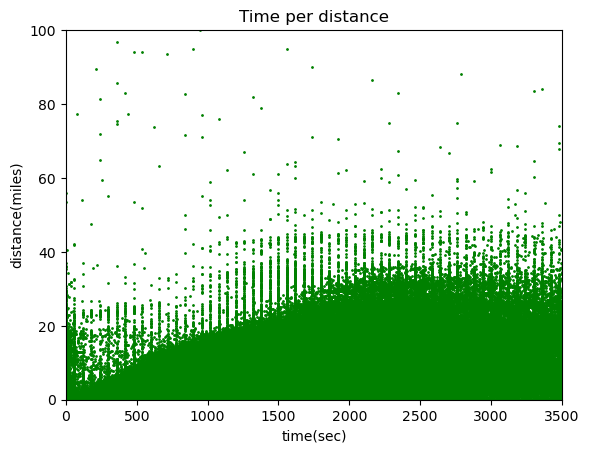

In [292]:
plt.scatter(df["Trip Seconds"], df["Trip Miles"], 
            c="green", s = 1)
plt.xlabel("time(sec)")
plt.ylabel("distance(miles)")
plt.xlim(0, 3500)
plt.ylim(0, 100)
plt.title("Time per distance")
plt.show()

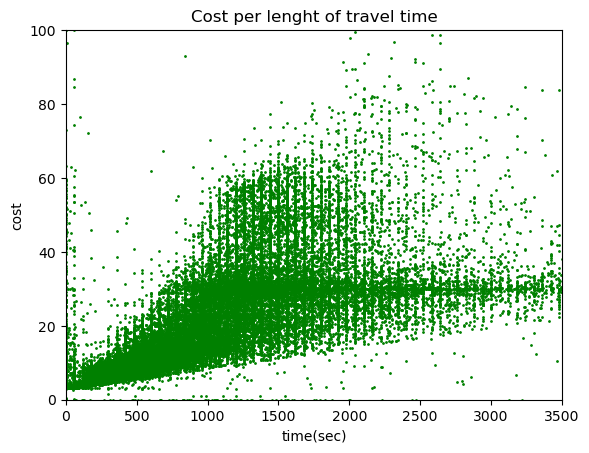

In [296]:
plt.scatter(df["Trip Seconds"][:50000], df["Trip Total"][:50000], 
            c="green", s = 1)
plt.xlabel("time(sec)")
plt.ylabel("cost")
plt.xlim(0, 3500)
plt.ylim(0, 100)
plt.title("Cost per lenght of travel time")
plt.show()

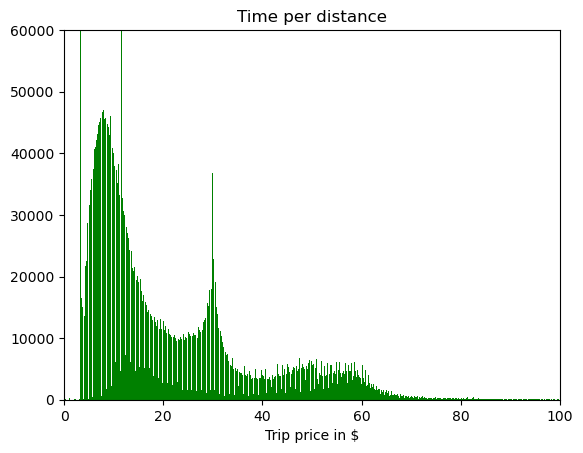

In [301]:
plt.hist(df["Trip Total"], bins=50000, color="green")
plt.xlabel("Trip price in $")
plt.title("Time per distance")
plt.xlim(0, 100)
plt.ylim(0, 60000)
plt.show()

In [42]:
df["Trip Total"].max()

9900.29

In [79]:
df_pickup_count = df.groupby(["Pickup Centroid Location"])\
                    .size()\
                    .reset_index(name='counts')\
                    .sort_values(by='counts', ascending=False)
  

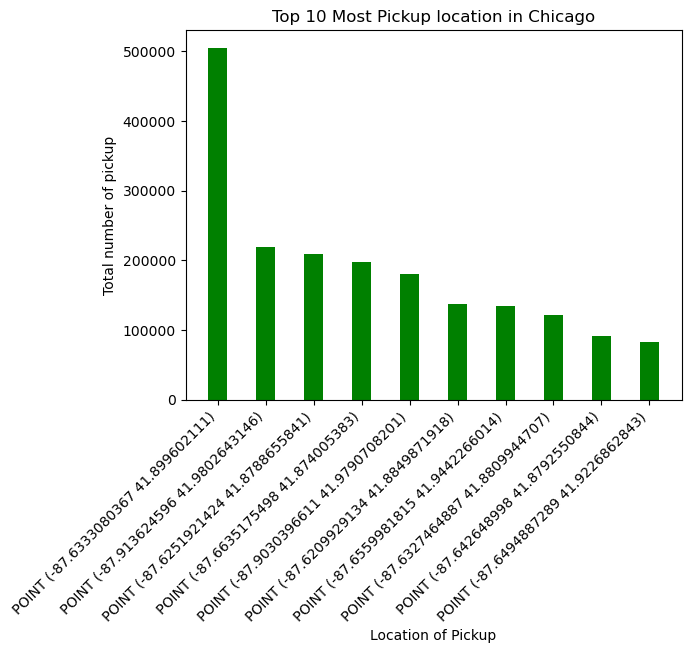

In [300]:
plt.bar(df_pickup_count["Pickup Centroid Location"][:10], 
        df_pickup_count["counts"][:10],
        color="green", width=0.4)
plt.title("Top 10 Most Pickup location in Chicago")
plt.xlabel("Location of Pickup")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total number of pickup")
plt.show()

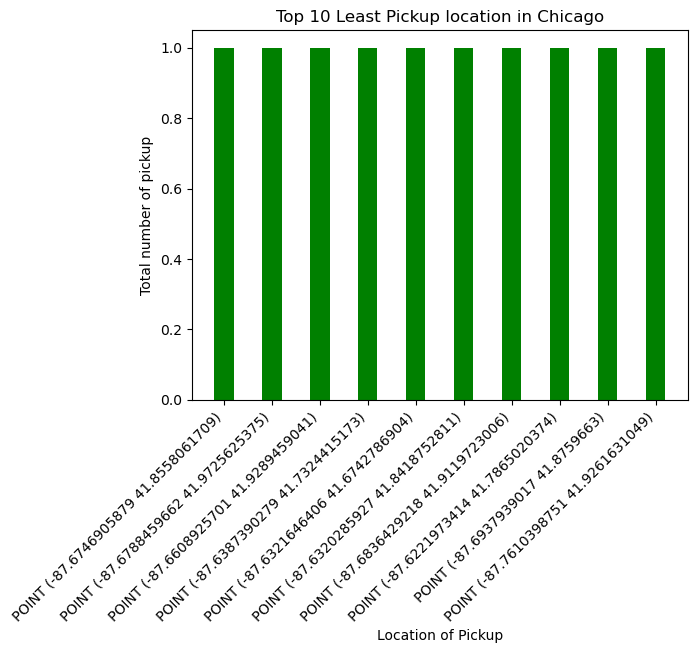

In [304]:
plt.bar(df_pickup_count["Pickup Centroid Location"][-10:], 
        df_pickup_count["counts"][-10:],
        color="green", width=0.4)
plt.title("Top 10 Least Pickup location in Chicago")
plt.xlabel("Location of Pickup")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total number of pickup")
plt.show()

In [102]:
df_dropoff_count = df.groupby(["Dropoff Centroid  Location"])\
                    .size()\
                    .reset_index(name='counts')\
                    .sort_values(by='counts', ascending=False)


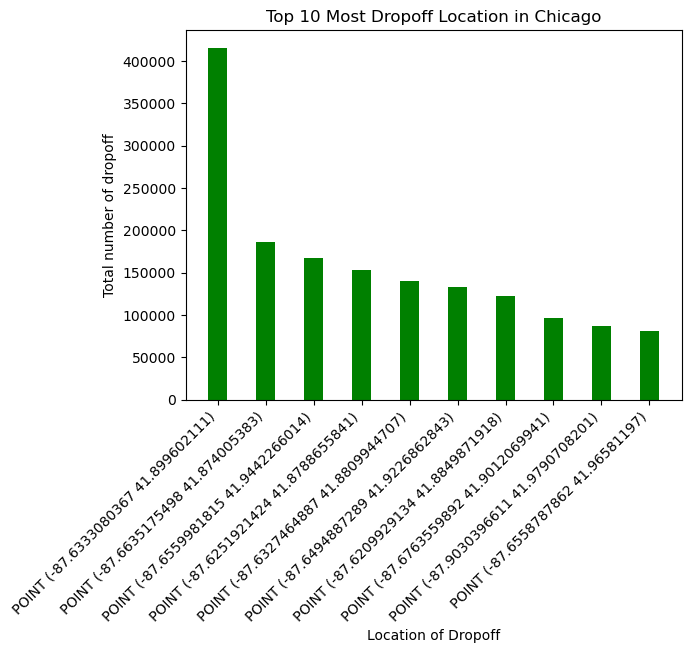

In [309]:
plt.bar(df_dropoff_count["Dropoff Centroid  Location"][:10], 
        df_dropoff_count["counts"][:10],
        color="green", width=0.4)
plt.title("Top 10 Most Dropoff Location in Chicago")
plt.xlabel("Location of Dropoff")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total number of dropoff")
plt.show()

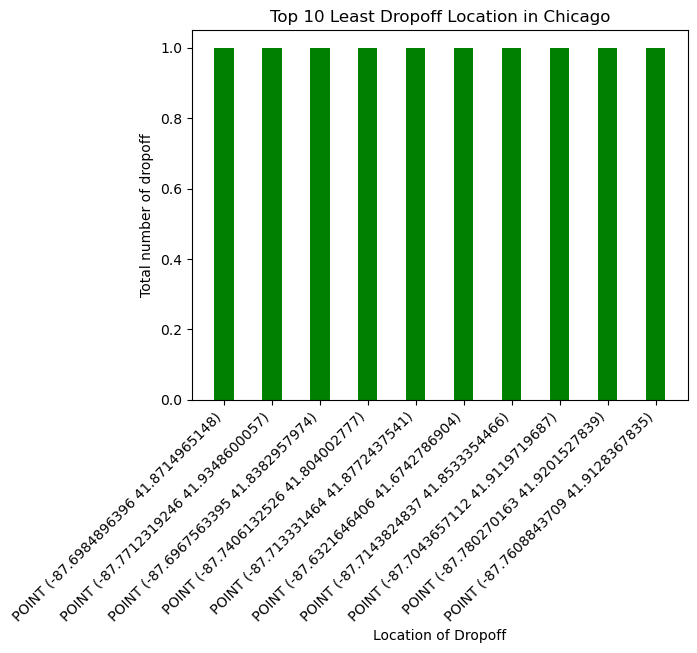

In [320]:
plt.bar(df_dropoff_count["Dropoff Centroid  Location"][-10:], 
        df_dropoff_count["counts"][-10:],
        color="green", width=0.4)
plt.title("Top 10 Least Dropoff Location in Chicago")
plt.xlabel("Location of Dropoff")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total number of dropoff")
plt.show()

In [322]:
def day_parser(day):
    return day.split(" ")[0]

In [323]:
df_date = list(map(lambda x: day_parser(x), df["Trip Start Timestamp"])) 
df_day_count = dict(Counter(df_date))
df_day_count ={k:v for k,v in sorted(df_day_count.items(), key=lambda x:x[1], reverse=True)}

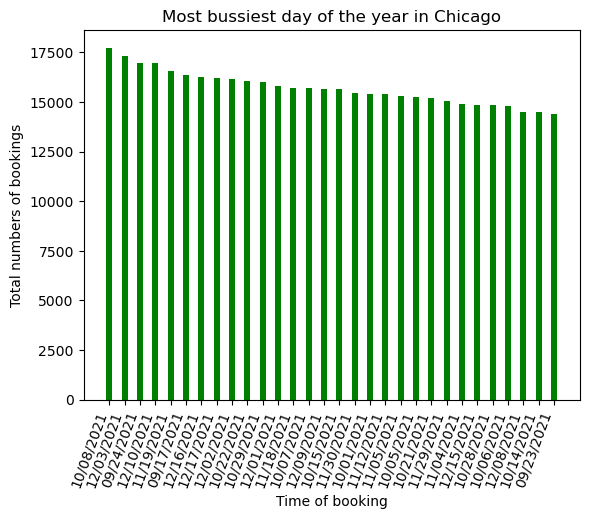

In [324]:
plt.bar(list(df_day_count.keys())[:30], 
        list(df_day_count.values())[:30],
        color='green', width=0.4)
plt.title("Most bussiest day of the year in Chicago")
plt.xlabel("Time of booking")
plt.xticks(rotation=70, ha='right')
plt.ylabel("Total numbers of bookings")
plt.show()

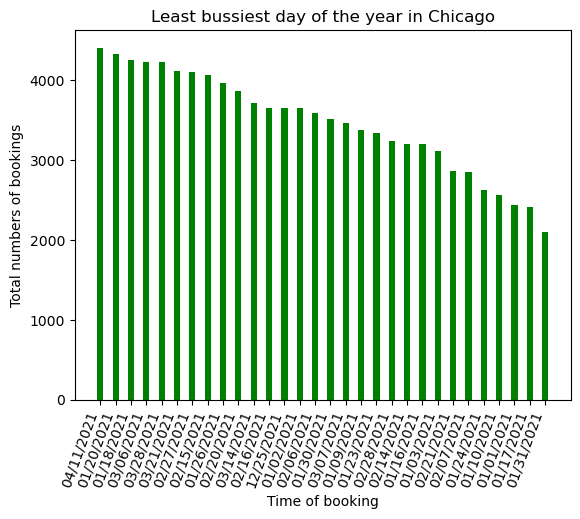

In [325]:
plt.bar(list(df_day_count.keys())[-30:], 
        list(df_day_count.values())[-30:],
        color='green', width=0.4)
plt.title("Least bussiest day of the year in Chicago")
plt.xlabel("Time of booking")
plt.xticks(rotation=70, ha='right')
plt.ylabel("Total numbers of bookings")
plt.show()

In [149]:
def datetime_timesstamp(datetime_str):
    givendatetime = datetime.strptime('01/01/2021 12:00:00 AM', '%m/%d/%Y %H:%M:%S %p')
    return datetime.timestamp(givendatetime)

In [144]:
def time_parser(datetime):
    return ''.join(datetime.split(' ')[1:])

In [326]:
df_date = list(map(lambda x: time_parser(x), df["Trip Start Timestamp"])) 
df_time_count = dict(Counter(df_date))
df_time_count ={k:v for k,v in sorted(df_time_count.items(), key=lambda x:x[1], reverse=True)}

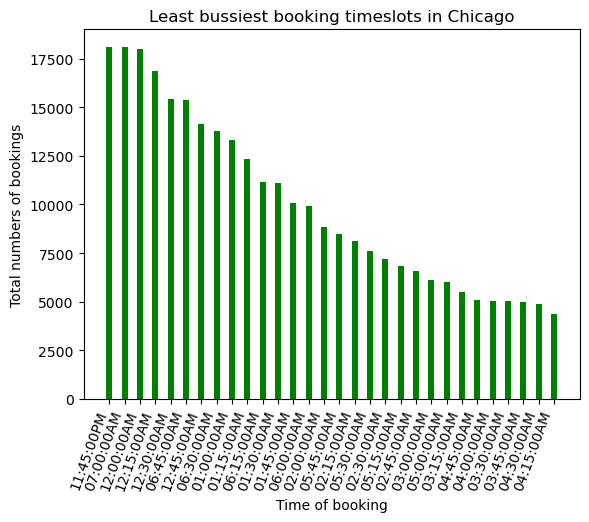

In [327]:
plt.bar(list(df_time_count.keys())[-30:], 
        list(df_time_count.values())[-30:],
        color='green', width=0.4)
plt.title("Least bussiest booking timeslots in Chicago")
plt.xlabel("Time of booking")
plt.xticks(rotation=70, ha='right')
plt.ylabel("Total numbers of bookings")
plt.show()

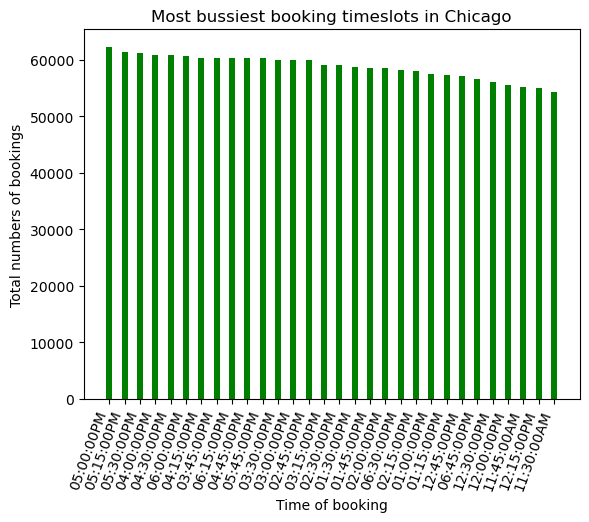

In [328]:
plt.bar(list(df_time_count.keys())[:30], 
        list(df_time_count.values())[:30],
        color='green', width=0.4)
plt.title("Most bussiest booking timeslots in Chicago")
plt.xlabel("Time of booking")
plt.xticks(rotation=70, ha='right')
plt.ylabel("Total numbers of bookings")
plt.show()

In [278]:
min_long = min(df["Pickup Centroid Longitude"].min(), df["Dropoff Centroid Longitude"].min())
max_long = max(df["Pickup Centroid Longitude"].max(), df["Dropoff Centroid Longitude"].max())
min_lat = min(df["Pickup Centroid Latitude"].min(), df["Dropoff Centroid Latitude"].min())
max_lat = max(df["Pickup Centroid Latitude"].max(), df["Dropoff Centroid Latitude"].max())

In [279]:
Map_Dim = ((min_long, max_long, min_lat, max_lat))

In [280]:
Map_Dim

(-87.913624596, -87.531386257, 41.650221676, 42.021223593)

In [281]:
city_map = plt.imread('map.png')

In [20]:
#df["Pickup Centroid Latitude"].mean()

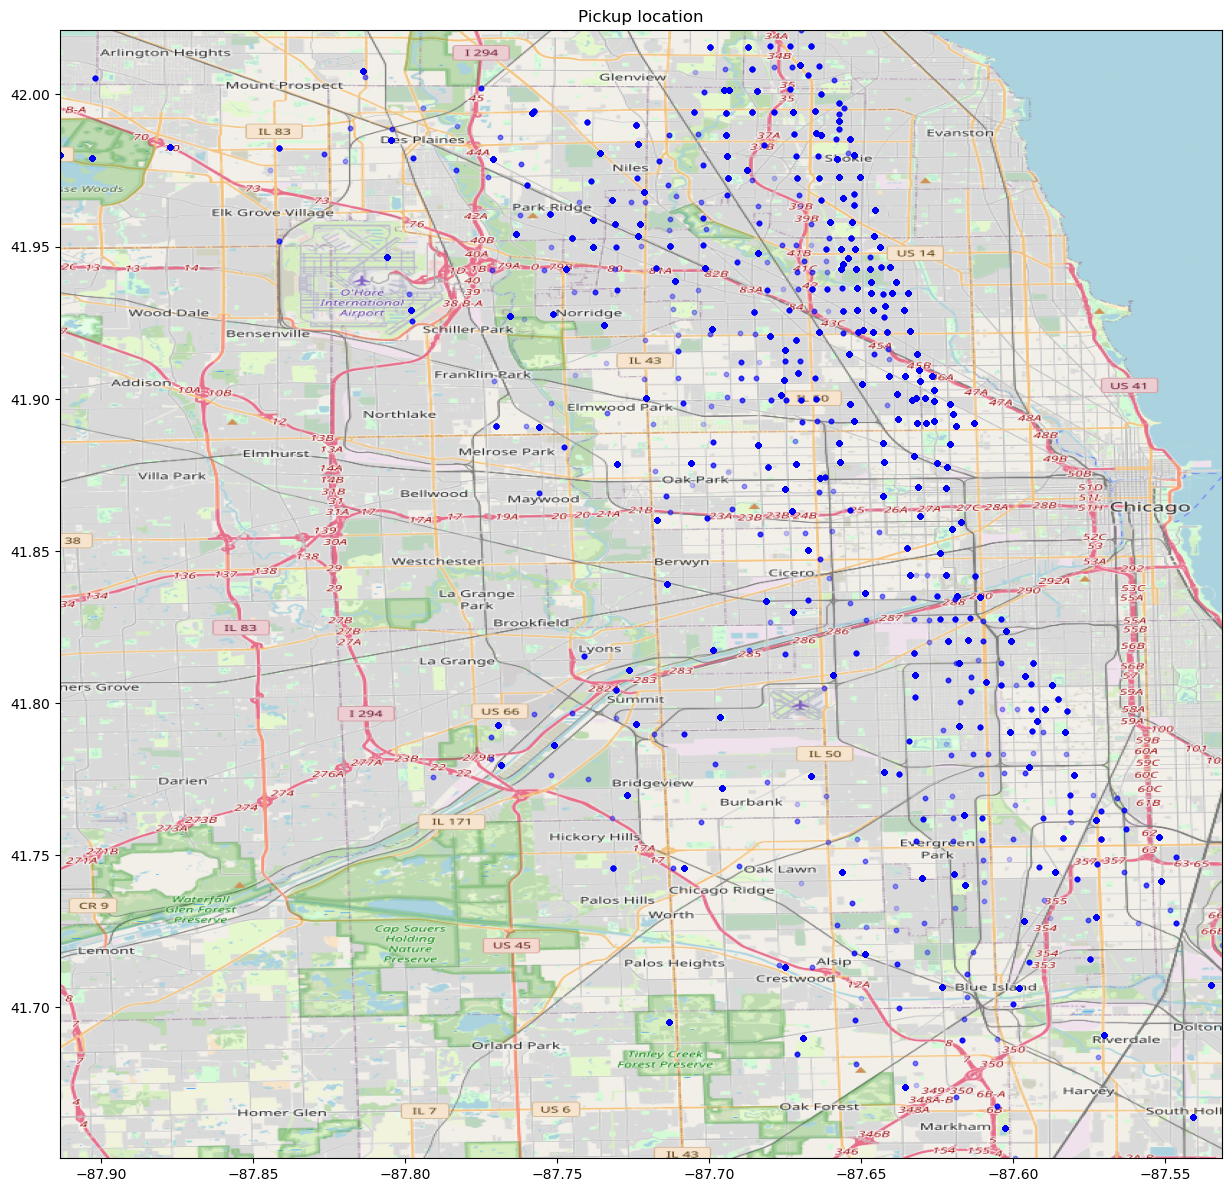

In [330]:
fig, ax = plt.subplots(figsize = (15,20))

source_point = [-87.85, 41.50]
destination_point = [-87.75, 41.95]  #[df["Pickup Centroid Longitude"], df["Dropoff Centroid Latitude"]]
ax.scatter(df["Pickup Centroid Longitude"], df["Pickup Centroid Latitude"], 
           zorder=1, alpha= 0.2, c='b', s=10)

#ax.plot(source_point,destination_point, 'k-')

ax.set_title('Pickup location')
ax.set_xlim(Map_Dim[0],Map_Dim[1])
ax.set_ylim(Map_Dim[2],Map_Dim[3])
ax.imshow(city_map, zorder=0, extent = Map_Dim, aspect= 'equal')

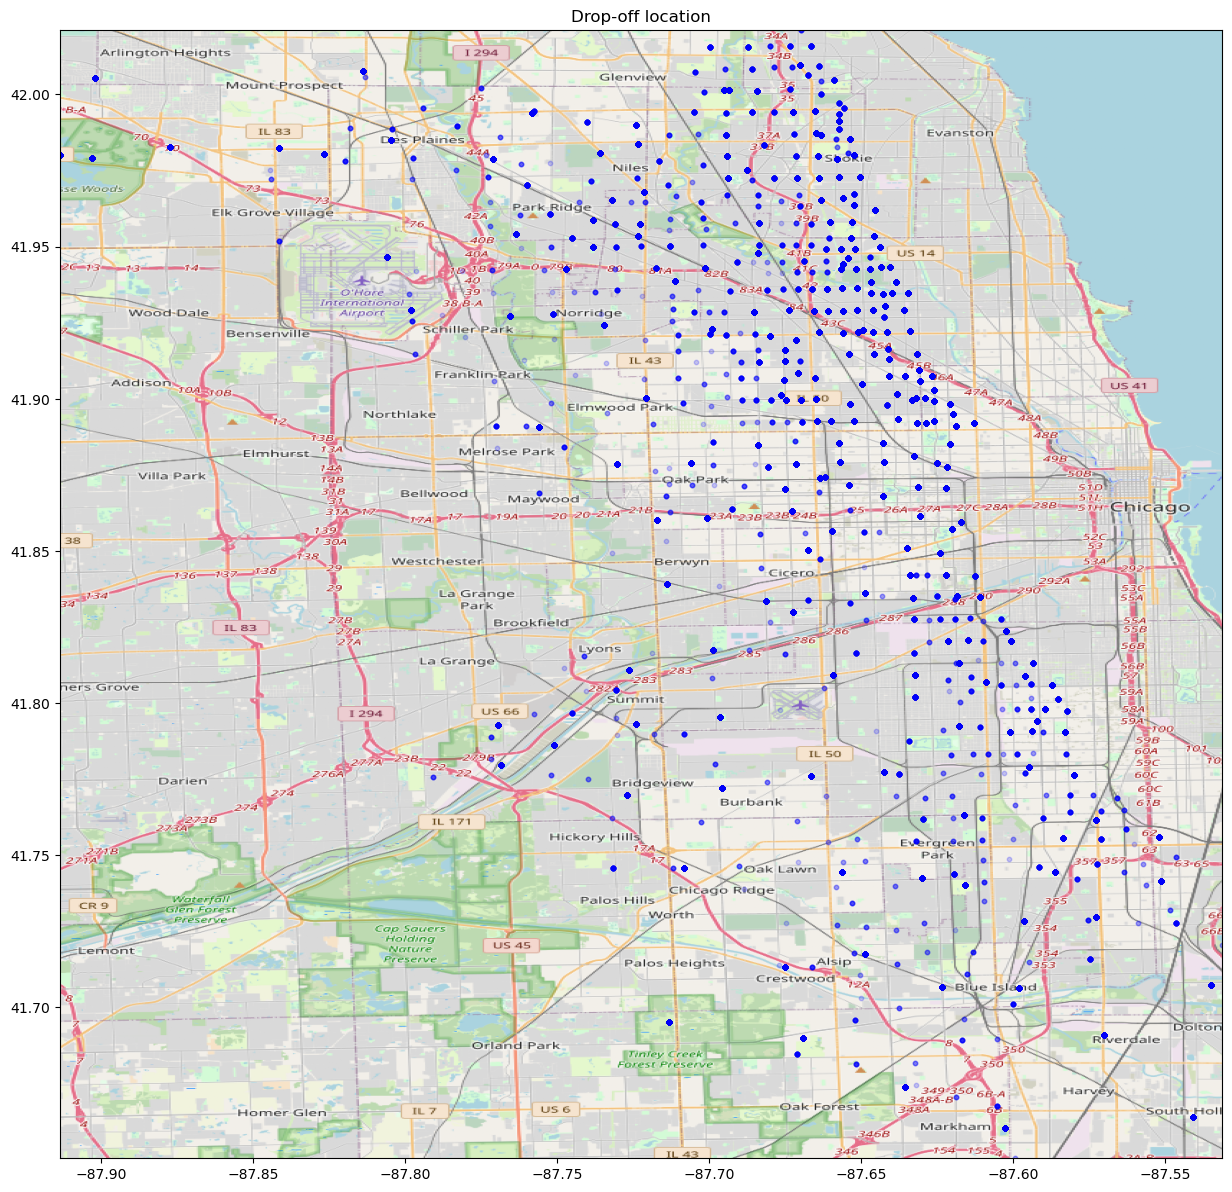

In [283]:
fig, ax = plt.subplots(figsize = (15,20))

source_point = [-87.85, 41.50]
destination_point = [-87.75, 41.95]  #[df["Pickup Centroid Longitude"], df["Dropoff Centroid Latitude"]]
ax.scatter(df["Dropoff Centroid Longitude"], df["Dropoff Centroid Latitude"], 
           zorder=1, alpha= 0.2, c='b', s=10)

#ax.plot(source_point,destination_point, 'k-')

ax.set_title('Drop-off location')
ax.set_xlim(Map_Dim[0],Map_Dim[1])
ax.set_ylim(Map_Dim[2],Map_Dim[3])

ax.imshow(city_map, zorder=0, extent = Map_Dim, aspect= 'equal')